## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hedden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMEMTUM = [0.95, 0.50, 0.05]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMEMTUM:
    keras.backend.clear_session()
    print("Experiment with MOMEMTUM = %.3f" % (mom))
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mom-%s"%str(mom)
    results[exp_name_tag] = {"train-loss" : train_loss,
                                        "valid-loss" : valid_loss,
                                        "train-acc" : train_acc,
                                        "valid-acc" : valid_acc}

Experiment with MOMEMTUM = 0.950
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hedden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hedden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.2267 - acc: 0.1978 - val_loss: 2.1611 - val_acc: 0.2508
Epoch 2/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1121 - acc: 0.2632 - val_loss: 2.0701 - val_acc: 0.2812
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0355 - acc: 0.2844 - val_loss: 2.0072 - val_acc: 0.2973
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9825 - acc: 0.3043 - val_loss: 1.9627 - val_acc: 0.3110
Epoch 5/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.9426 - acc: 0.3202 - val_loss: 1.9295 - val_acc: 0.3332
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9111 - acc: 0.3330 - val_loss: 1.8996 - val_acc: 0.3449
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8852 - acc: 0.3441 - val_loss: 1.8774 - val_

Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1800 - acc: 0.2033 - val_loss: 2.1487 - val_acc: 0.2191
Epoch 3/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1193 - acc: 0.2376 - val_loss: 2.0946 - val_acc: 0.2519
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.0704 - acc: 0.2581 - val_loss: 2.0502 - val_acc: 0.2681
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.0308 - acc: 0.2762 - val_loss: 2.0139 - val_acc: 0.2826
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9992 - acc: 0.2900 - val_loss: 1.9861 - val_acc: 0.3000
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9733 - acc: 0.3054 - val_loss: 1.9631 - val_acc: 0.3047
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9518 - acc: 0.3134 - val_loss: 1.9432 - val_acc: 0.3182
Epoch 9/50
50000/50000 [=================

In [20]:
print(results.keys)

<built-in method keys of dict object at 0xb424a8b40>


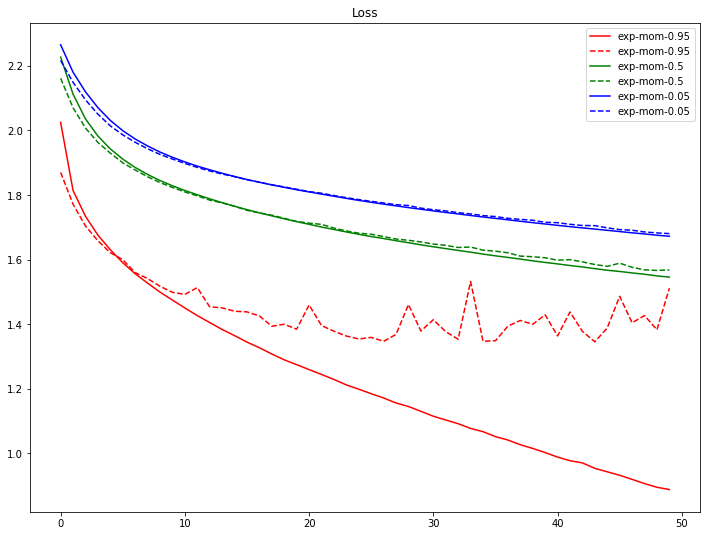

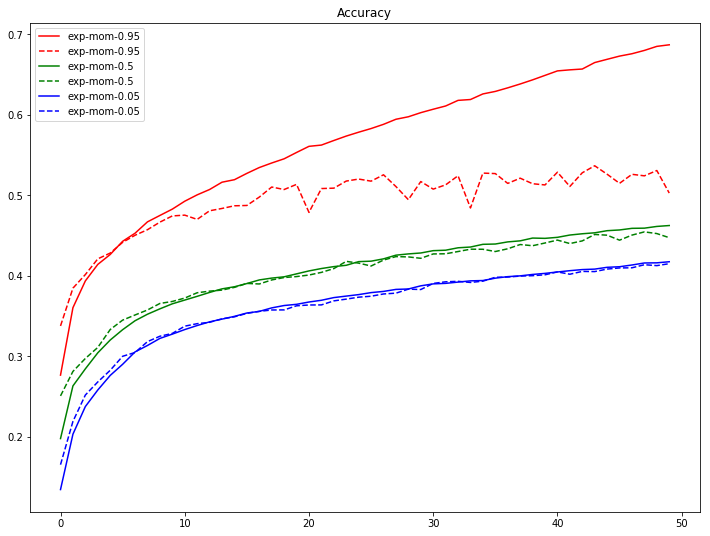

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b"]

plt.figure(figsize=(12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()